# Heart Disease Predictor

In [459]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [460]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# EDA (Exploratory Data Analysis)

In [461]:
df.shape

(918, 12)

In [462]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [464]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [465]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [466]:
df.duplicated().sum()

np.int64(0)

In [467]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

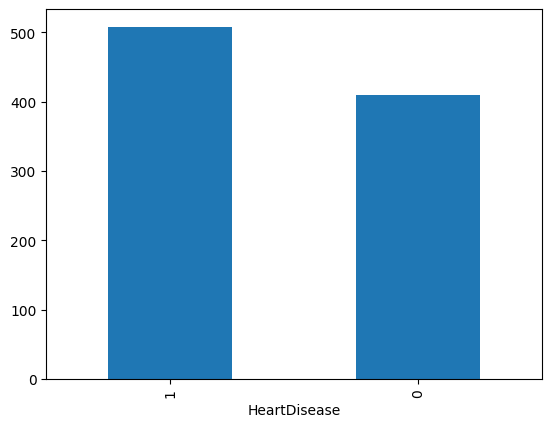

In [468]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

now we are gonna check the numerical distribution of our

In [469]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

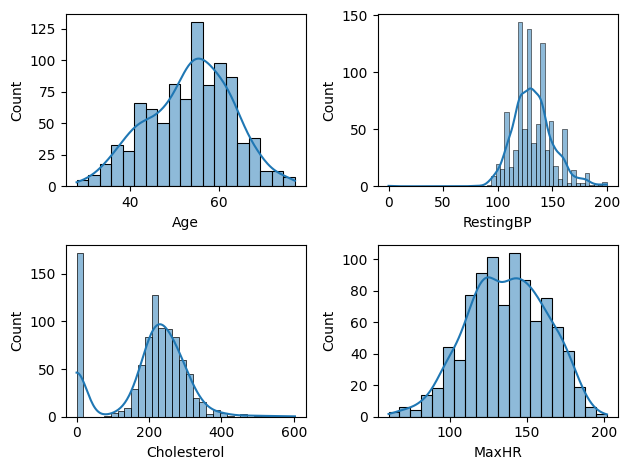

In [470]:
def plotting(var, num):
    plt.subplot(2, 2, num)
    sns.histplot(df[var], kde = True)
    plt.tight_layout()
plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)


In [471]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [472]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()

In [473]:
df['Cholesterol'] = df['Cholesterol'].replace(0, ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [474]:
df.head(8)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339.0,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237.0,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208.0,0,Normal,142,N,0.0,Up,0


In [475]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)

df['RestingBP'] = df['RestingBP'].round(2)

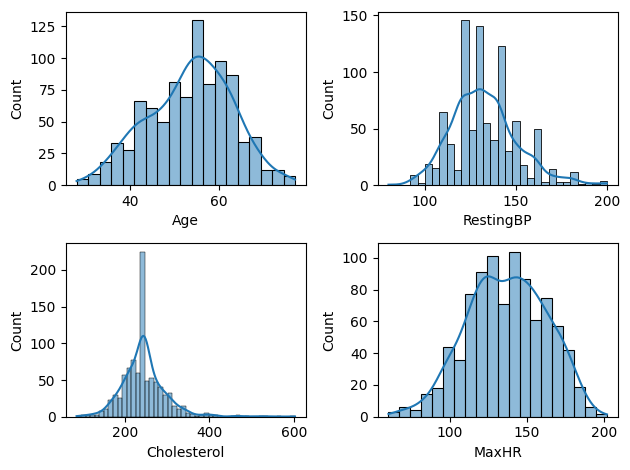

In [476]:
def plotting(var, num):
    plt.subplot(2, 2, num)
    sns.histplot(df[var], kde = True)
    plt.tight_layout()
plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)


In [477]:
!pip install sheryanalysis


In [478]:
import sheryanalysis as sh
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 12)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

<Axes: xlabel='Sex', ylabel='count'>

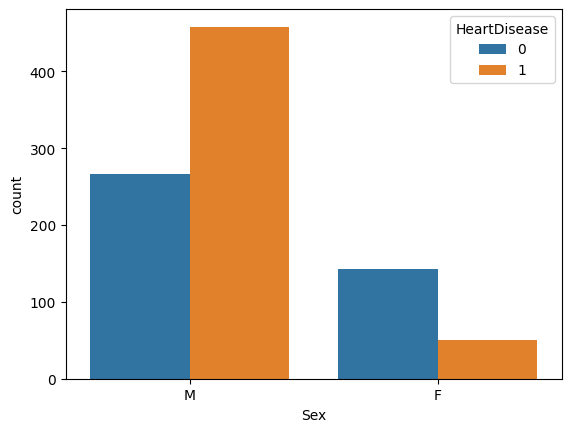

In [479]:
sns.countplot(x = df['Sex'], hue = df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

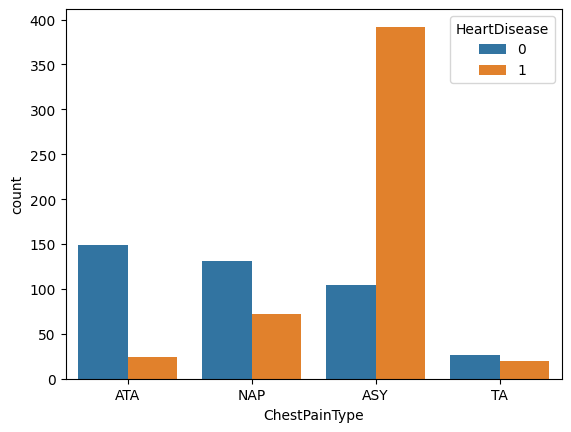

In [480]:
sns.countplot(x = df['ChestPainType'], hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

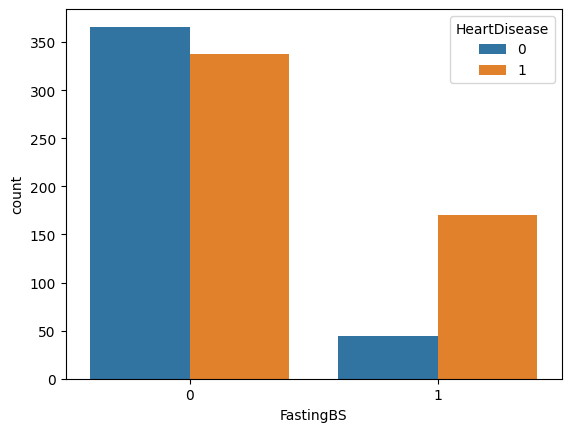

In [481]:
sns.countplot(x = df['FastingBS'], hue = df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

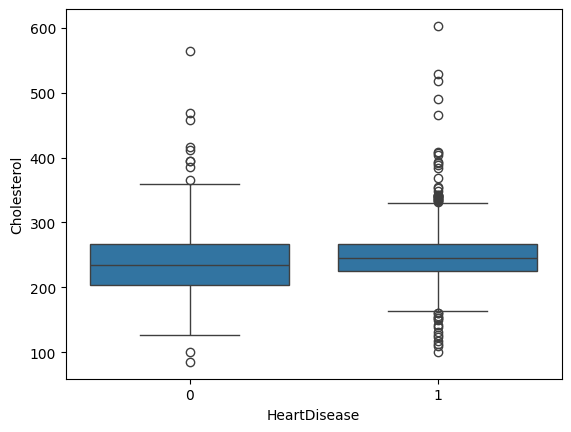

In [482]:
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol',data = df)


<Axes: xlabel='HeartDisease', ylabel='Age'>

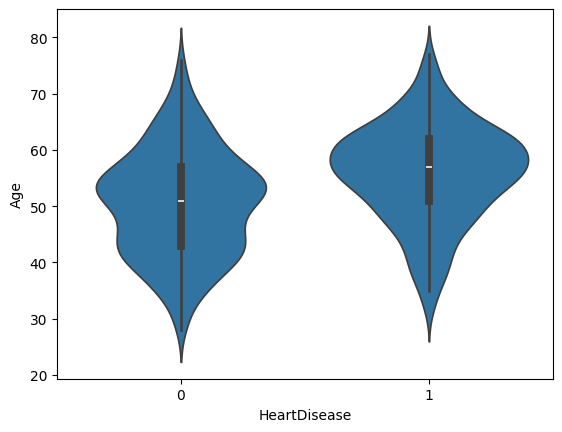

In [483]:
sns.violinplot(x='HeartDisease', y='Age', data=df)


<Axes: >

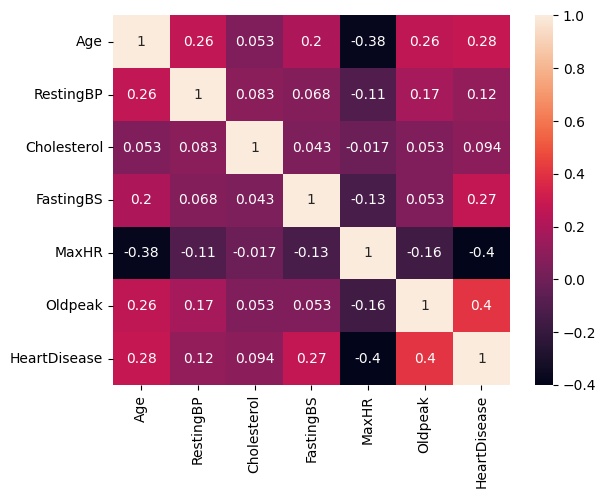

In [484]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


# Data Preprocessing and Extraction

In [485]:
df_encode = pd.get_dummies(df,drop_first=True)


In [486]:
df_encode


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [487]:
df_encode['cholesterol_bin'] = pd.cut(df_encode['Cholesterol'], bins=[0, 200, 239, df_encode['Cholesterol'].max()+1], labels=['Normal','Borderline_High','High'], right=False)
df_encode = pd.get_dummies(df_encode, columns=['cholesterol_bin'], drop_first=True)
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,cholesterol_bin_Borderline_High,cholesterol_bin_High
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False,False,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False,False,True
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False,False,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False,False,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False,True,False


In [488]:
df_encode = df_encode.astype(int)

In [489]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,cholesterol_bin_Borderline_High,cholesterol_bin_High
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0,0,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0,0,1
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0,0,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0,0,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0,1,0


In [490]:
# numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# scaler = StandardScaler()
# df_encode[numerical_cols] = scaler.fit_transform(df_encode[numerical_cols])


In [491]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up',
       'cholesterol_bin_Borderline_High', 'cholesterol_bin_High'],
      dtype='object')

In [492]:
X = df_encode.drop('HeartDisease', axis=1)
y = df_encode['HeartDisease']

In [493]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [494]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [495]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [499]:
Models = {
    'LogisticRegression' : LogisticRegression(),
    'KNearestNeighbour' : KNeighborsClassifier(),
    'NaiveBayesClassifier' : GaussianNB(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'SupportVectorClassifier' : SVC(kernel = 'linear', probability=True)
}

In [500]:
for name, model in Models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy Score of {name}: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report of {name}: {classification_report(y_test, y_pred)}")

Accuracy Score of LogisticRegression: 0.875
Classification Report of LogisticRegression:               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

Accuracy Score of KNearestNeighbour: 0.8532608695652174
Classification Report of KNearestNeighbour:               precision    recall  f1-score   support

           0       0.81      0.84      0.83        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Accuracy Score of NaiveBayesClassifier: 0.8532608695652174
Classification Report of NaiveBayesClassifier:               precision    recall  f1-score   suppo

In [502]:
import joblib
joblib.dump(Models['LogisticRegression'], 'LRH.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'columns.pkl')

['columns.pkl']

## **Created By:** *Hafiz Muhammad Talal*